
**به طور کلی این الگوریتم به دنبال یافتن معادله ای با یک بعد کمتر از تعداد فیچیر ها برای جداسازی بین دسته های مختلف است**


## Maximom Margin Classifier
تعیین نقطه یا صفحه ای که بین دو دسته بیشترین فاصله را ایجاد کند
<br>
به این جدا کننده، هایپر پلین
<br>
**HyperPlane**
<br>
گفته می شود
<br>

0000   *   11111

<br>

اما این اتفاق همیشه شدنی نیست و ممکن است نقاط مختلفی برای این **جدا کننده** وجود داشته باشد

<br>

000*10    * 11111

<br>

## Support Cector Classifier
<br>
بنابرین به سراغ مفهوم دیگری می رویم که در آن اجازه تعیین کلاس اشتباه نیز در بک بازه ای داده می شود
<br>
by soft margin allow for missclassification inside the margin
<br>
اما باز هم به شرایطی بر می خوریم که نمی توانیم با مسئله مون رو به راحتی حل کنیم

<br>

000001111100000

<br>

بنابرین نیاز هست که به سراغ روش دیگری برویم

<br>

## Support Vector Machine

<br>

به این صورت است که داده ها رو در **فضای دیگری** می برد که به راحتی بتواند توسط یک هایپر پلین آن ها را از هم جدا کند مثلا در مثال فوق داده ها رو به فضای دو بعدی می برد و توسط یک خط آن ها را از هم جدا می کند 
<br>

این بردن به فضای دیگر توسط **کرنل** های گوناگون اتفاق می افتد
<br>





## فراخوانی کتابخانه ها

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## درباره دیتا
این دیتا ست مربوط به تاثیر دو دوز مختلف دارو بر روی موش های آلوده به ویروس به خصوصی است و می خواهیم از ترکیب های مختلف از این 
دارو ها بر روی ویروس مطمئن شویم

<br> 
**یه نکنه ی خیلی مهم، همیشه در مسائل بردار های پیشتیبان، باید استاندارد سازی دیتا ها رو انجام بدین**
<br> 
البته در این مثال به خصوص استانداردسازی و تقسیم داده ها به دو گروه ترین و تست، به منظور خلاصه سازی انجام نشده است
<br> 
برای حل این مسئله از یک تابعی نیز استفاده شده است که در قالب یک فایل پایتون در فولدر این برنامه موجود می باشد و هدف آن رسم بردار های پیشتیبان به همراه داده ها و فضای بین آن ها می باشد

In [6]:
df = pd.read_csv("../DATA/mouse_viral_study.csv")

In [7]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [8]:
df.columns

Index(['Med_1_mL', 'Med_2_mL', 'Virus Present'], dtype='object')

## EDA
در اولین قدم سعی می کنیم وجود دو کلاس های مختلف در داده ها را با توجه به خروجی مسئله، کشف کنیم

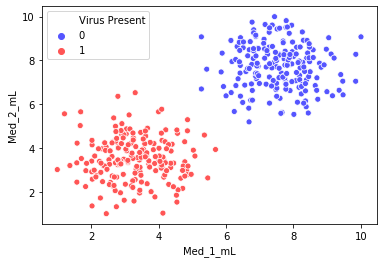

In [9]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',
                data=df,palette='seismic')

## هایپر پلین

هدف ما در این مسئله  با دو فیچر یا به عبارتی دو بعدی پیدا کردن یک معادله
<br>
**N-1**
<br>
بعدی  یا یه خط است که به خوبی بتواند دسته های مختلف را از هم جدا کند
<br>
در پایین و به عنوان نمونه چنین خطی را ترسیم می کنیم. اما این خط می تواند ضرایب مختلفی را داشته باشد

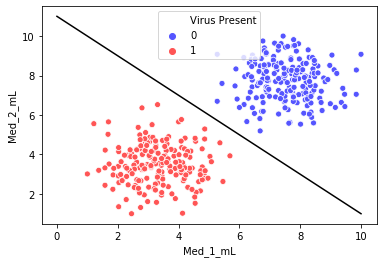

In [10]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',palette='seismic',data=df)


x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x,y,'k')

اما این خط می تواند حالت های مختلفی را داشته باشد. برای پیدا کردن بهترین ضرایب و بهترین خط به سراغ بردار های پیشتیبان می رویم

## SVM - Support Vector Machine

In [11]:
from sklearn.svm import SVC # Supprt Vector Classifier

In [12]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  oth

## تعیین متغیر های ورودی و خروجی

متغیر های مسئله به همراه خروجی را در داده ها مشخص می کنیم

In [14]:
y = df['Virus Present']
X = df.drop('Virus Present',axis=1) 

## تعیین مدل و پارامتر های آن

پارامتر
<br>
**c**
<br>
با
<br>
**missclassification**
<br>
و همچنین
<br>
**regularization**
<br>
در ارتباط است. **هر چه سی کمتر باشد، اجازه داشتن مقادیر بیشتری از میسکلاسیفیکیشن داده می شود** و این پارامتر رابطه ی **معکوسی** با رگولاریزیشن دارد


------
کرنل را می توان نوع جداکننده نامید
<br>
پارامتر مربوط به **کرنل** دارای انواع مختلفی است
<br>


**1.linear**
<br>
خطی ساده است. زمان هایی که به راحتی دسته های مختلف قابل تمییز هستند
<br>

**2.rbf**
<br>
به طور پیشفرض روی این تنظیم شده و معمولا روی بیشتر مسائل خیلی خوب جواب می دهد
<br>
زمانی که از این کرنل استفاده کنیم پارامتر دیگری نیز می تواند تنظیم شود
<br>
**gamma** --> auto , scale* , (define number)

<br>

یعنی هر ترینیگ دیتا چه قدر روی مدل اثر دارد. هر چه بیشتر شود به سمت اور فیت پیش می رویم
<br>

**3.sigmoid**
 <br>
 **4.poly**
 
 همون چند جمله ای هست و باید پارامتر دیگری نیز تعریف شود یعنی درجه چند جمله ای
<br>
**degree**


In [15]:
model = SVC(kernel='linear', C=1000)
model.fit(X, y)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
# This is imported from the supplemental .py file
# به منظور ترسیم نمودار زیر
from svm_margin_plot import plot_svm_boundary

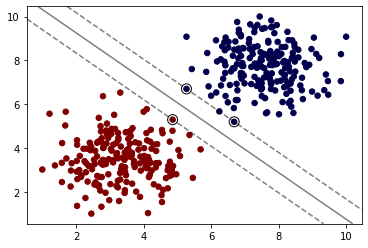

In [17]:
plot_svm_boundary(model,X,y)

## Hyper Parameters

### C

با کاهش پارامتر سی شاهد افزایش داده های میس کلاسیفیکیشن خواهیم بود

In [18]:
model = SVC(kernel='linear', C=0.05)
model.fit(X, y)

SVC(C=0.05, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

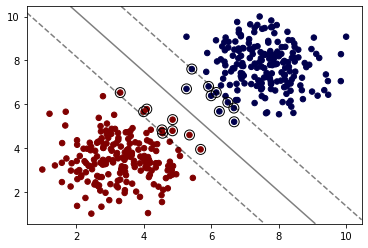

In [19]:
plot_svm_boundary(model,X,y)

### Kernel

 در ادامه کرنل های دیگر را نیز تست می کنیم

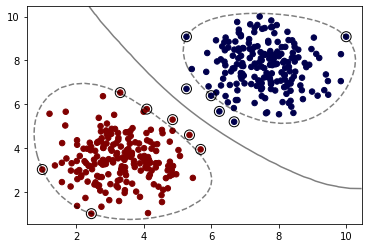

In [20]:
model = SVC(kernel='rbf', C=1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

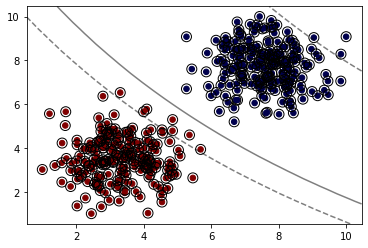

In [21]:
model = SVC(kernel='sigmoid')
model.fit(X, y)
plot_svm_boundary(model,X,y)

#### درجه چند جمله ای

همان طور که اشاره شد در این کرنل می توانیم درجه های مختلفی را تنظیم کنیم

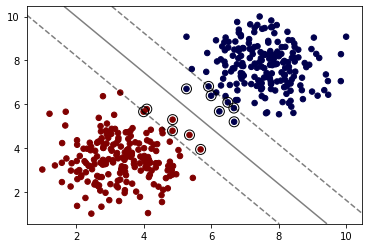

In [22]:
model = SVC(kernel='poly', C=1,degree=1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

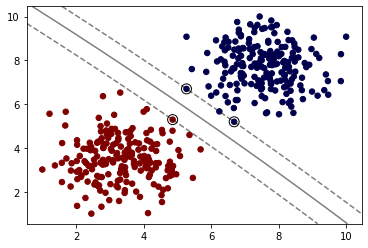

In [23]:
model = SVC(kernel='poly', C=1,degree=2)
model.fit(X, y)
plot_svm_boundary(model,X,y)

## Grid Search

معمولا در مسائلی که پارامتر های مختلفی می توان اتخاذ کرد، بهترین روش استفاده از کراس ولیدیشن و گرید سرچ به منظور تست پارامتر های مختلف و رسیدن به بهترین آن هاست

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)

In [26]:
# یادمون باشه در این مسئله و به خاطر ساده سازی، از تقسیم داده ها به دو نوع تست و ترین خودداری کردیم
grid.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [27]:
# 100% accuracy (as expected)
grid.best_score_

1.0

و به این ترتیب به بهترین پارامتر ها می رسیم

In [28]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

دلیل خطی بودن کرنل اینه که داده ها به راحتی و با یک خط می تونن از هم جدا بشن